`Alexei Raiu (#207330006)`

# 1. Exam 1 - Histograms.

## Libraries
**cv2** - a powerful computer vision library, available for various platforms
and programming languages. Has basic tools for image processing, filters,
drawing tools, and machine learning image analysis tools.

**matplotlib** - a widely used library for displaying images and drawing graphs.

In [1]:
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

## Image 1: Grayscale MRI image.

Our first image is grayscale, an MRI scan of the brain.

The image is grayscale, but is stored as an RGB image. To be truly treated as a
grayscale image, it needs to be loaded with corresponding parameters. CV2 allows
specifying the flag how to treat colors. `0` is for converting image to
grayscale on load.

Here we create a plot object, add caption, and display the image. We then print
the image dimensions.

Dim: 1280x720


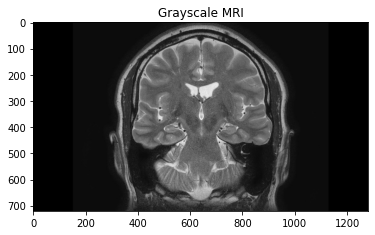

In [2]:
img = cv2.imread('mri.jpg', 0)
plt.figure()
plt.title('Grayscale MRI')
plt.imshow(img, cmap="gray")
print(f'Dim: {img.shape[1]}x{img.shape[0]}')

I also like how grayscale images are rendered without a `cmap="grayscale"`
parameter. The renderer applies a heatmap, using false color to make the shades
of gray more visible.

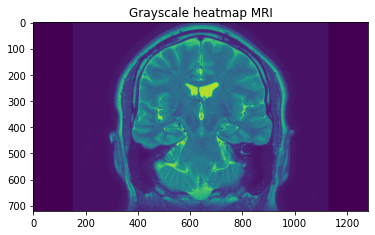

In [3]:
plt.figure()
plt.title('Grayscale heatmap MRI')
plt.imshow(img)

The histogram shows that the image is dark. It has some black pixels (the image
black border), and it has vary dark pixels from the background. There are few
pixels beyond 150, and no pixels beyond 180, which shows, that there is space
for improving the image quality.

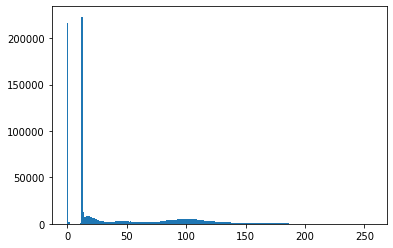

In [4]:
plt.figure()
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

## Image 2: Color Retina image.

The second image is a color image of a human retina. We load the image and print
its dimensions.

Dim: 1000x900


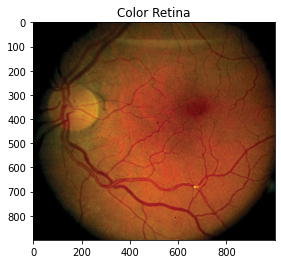

In [5]:
img = mpimg.imread('retina.jpg')
plt.figure()
plt.title('Color Retina')
plt.imshow(img)
print(f'Dim: {img.shape[1]}x{img.shape[0]}')

The histogram is here created for each channel, as well as grayscale (orange).

We build the diagram by enumerating through the colors and creating a histogram
for each using the `cv2.calcHist()` function. We then plot the histogram. Then,
we convert the image to grayscale and plot its histogram as well.

In the histogram we can see that the colors are strongly shifted towards red and
there is a disparity between the channels both vertically and horizontally.
There is a visible shift - r, g, and b channels are shifted on the intensity
axis. This usually means that the image may require color correction.

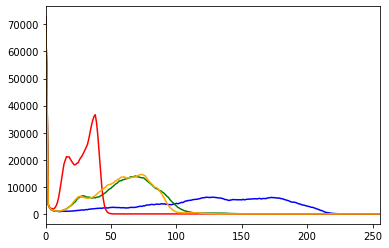

In [6]:
# Color values.
color = ('b','g','r')
plt.figure()
for i,col in enumerate(color): #loop required to go over each channel
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])

# Grayscale values.
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
histr = cv2.calcHist([grayImage],[0],None,[256],[0,256])
plt.plot(histr,color='orange')
plt.show()